In [2]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe

/Users/jimig/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
def make_goal_card(title_text, action_time, flavor_text, pvalue=0, icons=None, bad = False):
    '''
    Generate the art for a science goal card.
    
    Parameters
    -----------
    title_text: str
        Title of Card
    action_time: str
        whether card is played immediately or saved for later
    pvalue: str
        point value of card
    flavor_text: str
        Description/flavor text of card
    pvalue: int
        Point value (optional)
    icons: bool
       Add circles for icons (optional)
    '''
    
    fig, ax = plt.subplots()
    fig.set_size_inches((2.5,3.5))
    
    #background
    if bad:
        r = plt.Rectangle((0, 0), 1000, 1400, color='tab:red',zorder=1)
        ax.add_patch(r)
    
    else:        
        r = plt.Rectangle((0, 0), 1000, 1400, color='tab:blue',zorder=1)
        ax.add_patch(r)
    
    # Play time
    if action_time.lower() == 'immediately':
        r = plt.Rectangle((0, 900), 1000, 150, color='k',zorder=1)
        ax.add_patch(r)
        ax.text(500, 975, f'Play {action_time.title()}', ha='center', va='center', color='white',
                 fontsize=10, font='Georgia', fontweight='bold')
    else:
        r = plt.Rectangle((0, 900), 1000, 150, color='k',zorder=1)
        ax.add_patch(r)
        ax.text(500, 975, f'Play {action_time.title()}', ha='center', va='center', color='w',
                 fontsize=10, font='Georgia', fontweight='bold')

        


    # Title Text
    txt = ax.text(50, 1350, f'{title_text}', ha='left', va='top', color='white',
                 fontsize=16, font='silom', fontweight='bold')
    
    # Flavor Text
    txt = ax.text(100, 850, f'{flavor_text}', 
            ha='left', va='top', color='white', wrap= True,
                 fontsize=8, font='Georgia')
    
    txt._get_wrap_line_width = lambda : 160.


    # Big circle for points
    if pvalue:
        circle1 = plt.Circle((500, 300), 200, color='white', alpha=0.5, zorder=1)
        ax.add_patch(circle1)
        ax.text(500, 275, f'{pvalue}', ha='center', va='center', color='k', fontsize=48, font='silom')

    #plt.text(500,475, f'{pvalue}', ha='center', va='center', fontsize=40, font='silom')
    #plt.text(500,365, 'points', ha='center', va='center', fontsize=8, font='georgia')

    
    # Add Circles for Icons
    if icons == True:
        circle1 = plt.Circle((275, 250), 200, color='white', alpha=0.5, zorder=1)
        circle2 = plt.Circle((725, 250), 200, color='white', alpha=0.5, zorder=1)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        ax.text(275, 225, '?', ha='center', va='center', color='k', fontsize=48, font='silom')
        ax.text(725, 225, '?', ha='center', va='center', color='k', fontsize=48, font='silom')
        
        
    # Additional Formatting
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1400)
    ax.set_axis_off()
    plt.axis('off')
    
    title_text = title_text.replace('\n', ' ')
    plt.savefig(f'final_cards/CHAOS_{title_text}.png', bbox_inches='tight', pad_inches=0, dpi=200)
    plt.show()

    

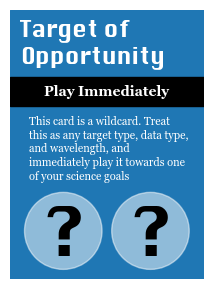

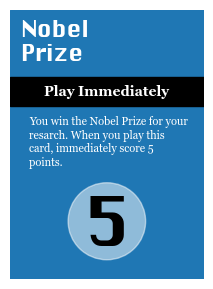

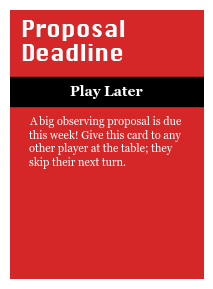

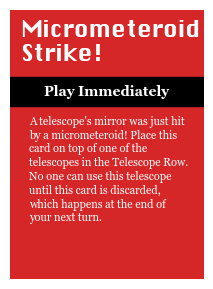

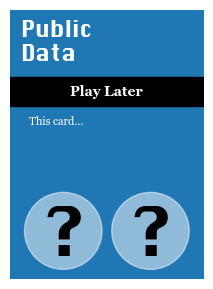

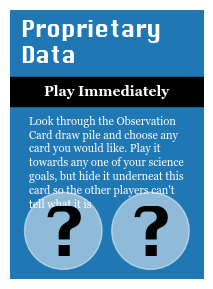

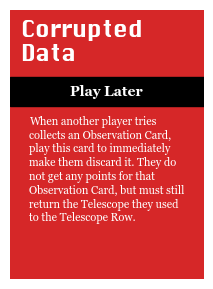

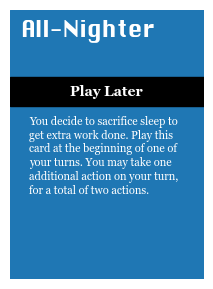

In [15]:
title ='Target of\nOpportunity'
action_time = 'immediately'
flavor_text = 'This card is a wildcard. Treat this as any target type, data type, and wavelength, and immediately play it towards one of your science goals'
make_goal_card(title, action_time, flavor_text,icons=True)


title ='Nobel\nPrize'
action_time = 'immediately'
flavor_text = 'You win the Nobel Prize for your resarch. When you play this card, immediately score 5 points. '
make_goal_card(title, action_time, flavor_text, pvalue=5)


title ='Proposal\nDeadline'
action_time = 'later'
flavor_text = 'A big observing proposal is due this week! Give this card to any other player at the table; they skip their next turn.'
make_goal_card(title, action_time, flavor_text, bad = True)

title ='Micrometeroid\nStrike!'
action_time = 'immediately'
flavor_text = "A telescope's mirror was just hit by a micrometeroid! Place this card on top of one of the telescopes in the Telescope Row. No one can use this telescope until this card is discarded, which happens at the end of your next turn."
make_goal_card(title, action_time, flavor_text, bad = True)


title ='Public\nData'
action_time = 'later'
flavor_text = "This card..."
make_goal_card(title, action_time, flavor_text, icons=True)


title ='Proprietary\nData'
action_time = 'immediately'
flavor_text = "Look through the Observation Card draw pile and choose any card you would like. Play it towards any one of your science goals, but hide it underneat this card so the other players can't tell what it is"
make_goal_card(title, action_time, flavor_text, icons=True)


title ='Corrupted\nData'
action_time = 'later'
flavor_text = "When another player tries to collect an Observation Card, play this card to immediately make them discard it. They do not get any points for that Observation Card, and must still return the Telescope they used to the Telescope Row."
make_goal_card(title, action_time, flavor_text, bad = True)


title ='All-Nighter'
action_time = 'Later'
flavor_text = "You decide to sacrifice sleep to get extra work done. Play this card at the beginning of one of your turns. You may take one additional action on your turn, for a total of two actions."
make_goal_card(title, action_time, flavor_text)



